<a href="https://colab.research.google.com/github/isabelesb/Previsao_de_churn_com_classificacao/blob/main/Classifica%C3%A7%C3%A3o_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas:

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Análise exploratória dos dados:

In [ ]:
# Carregando a base de dados
df = pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3.0,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1.0,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1.0,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2.0,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3.0,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Análise estatística básica
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,12447.000000,10554.000000,9868.000000,1795.000000,14559.000000,11285.000000,11367.000000
mean,43.712702,4390.117017,2.978618,2.510864,2.990041,2.992506,0.245095
std,15.058471,2507.774175,1.421950,1.127476,1.411480,1.154542,0.430163
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,31.000000,2244.000000,2.000000,2.000000,2.000000,1.980000,0.000000
50%,44.000000,4407.000000,3.000000,2.000000,3.000000,3.020000,0.000000
75%,57.000000,6534.750000,4.000000,4.000000,4.000000,3.980000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


<Axes: >

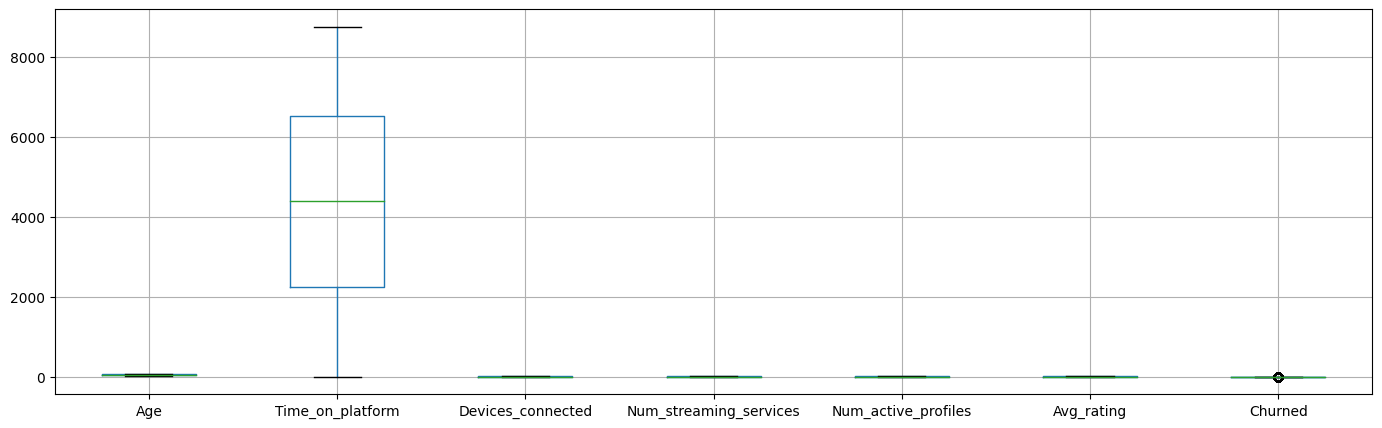

In [ ]:
df.boxplot(figsize=(17,5))

In [ ]:
# Análise de tipos dos dados e dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     12447 non-null  float64
 1   Gender                  11919 non-null  object 
 2   Time_on_platform        10554 non-null  float64
 3   Devices_connected       9868 non-null   float64
 4   Subscription_type       9823 non-null   object 
 5   Num_streaming_services  1795 non-null   float64
 6   Num_active_profiles     14559 non-null  float64
 7   Avg_rating              11285 non-null  float64
 8   Churned                 11367 non-null  float64
 9   User_id                 14559 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

Age                        2113
Gender                     2641
Time_on_platform           4006
Devices_connected          4692
Subscription_type          4737
Num_streaming_services    12765
Num_active_profiles           1
Avg_rating                 3275
Churned                    3193
User_id                       1
dtype: int64

In [ ]:
# Entendendo os valores nulos que há possibilidade de substiruirmos
print(f'Valores de Time_on_platform: {df.Time_on_platform.unique()}')
print(f'Valores de Devices_connected: {df.Devices_connected.unique()}')
print(f'Valores de Num_streaming_services: {df.Num_streaming_services.unique()}')
print(f'Valores de Num_active_profiles: {df.Num_active_profiles.unique()}')
print(f'Valores de Avg_rating: {df.Avg_rating.unique()}')

Valores de Time_on_platform: [4700. 6107. 6374. ... 8096. 1469. 7308.]
Valores de Devices_connected: [ 3.  2.  5.  1. nan  4.]
Valores de Num_streaming_services: [nan  1.  2.  3.  4.]
Valores de Num_active_profiles: [ 3.  1.  2.  4.  5. nan]
Valores de Avg_rating: [ nan 2.14 1.91 3.88 4.92 3.74 2.92 2.57 2.37 3.92 2.75 1.24 2.59 3.95
 1.73 1.7  3.13 3.9  3.44 3.89 2.29 2.45 2.17 3.52 1.37 2.73 2.72 2.97
 2.25 2.71 4.57 4.78 3.01 3.5  1.46 2.27 2.66 4.47 2.93 4.94 3.08 3.45
 1.48 4.31 4.5  3.04 3.68 3.34 3.7  1.33 4.05 1.97 3.29 1.38 4.54 3.51
 1.06 3.38 3.23 1.64 3.78 2.28 2.56 4.7  4.37 2.43 1.17 2.22 3.82 4.98
 2.42 3.77 1.6  1.96 3.67 1.42 3.65 3.21 4.42 2.54 1.68 4.32 2.35 3.09
 1.01 4.95 4.62 1.83 4.61 4.93 2.03 3.26 4.23 2.58 3.4  4.46 1.32 1.82
 3.19 2.19 2.83 4.01 3.97 1.19 3.83 1.66 4.12 2.15 2.23 3.66 2.76 4.06
 1.34 4.26 4.71 4.   3.3  4.29 4.64 1.51 1.55 2.6  2.7  3.25 1.49 4.25
 2.87 1.03 4.73 3.87 3.54 1.13 2.89 3.17 1.27 3.61 4.08 1.41 3.8  3.64
 1.2  3.07 4.15 2.65 4.38

In [ ]:
# Análise de dados duplicados
df.duplicated().sum()

0

Conclusões:
* Não há outliers, mas os dados precisam ser normalizados;
* Há muitos dados nulos, que precisarão ser tratados de formas diferentes. Alguns serão substituídos por 0 e outros dropados da base;
* Não há dados duplicados.

## Tratando os dados:

In [ ]:
# Tratando os nulos que podem ser substituídos (são dados que não possuem entrada 0, então usaremos esse valor).
df[['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']] = df[['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']].fillna(0)

In [ ]:
# Tratando nulos que devem ser retirados (são dados que não tem uma substituição simples e que, mesmo dropados, ainda deixarão nosso dataset rico o suficiente).
df = df.drop(columns='User_id')
df = df.dropna()

In [ ]:
#Transformando os valores de Churn em Yes e No
df.Churned.replace({0:['No'],
                    1:['Yes']}, inplace=True)

In [ ]:
# Passando variáveis float para int, para facilitar posteriormente.
df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']] = df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5423 entries, 0 to 14558
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5423 non-null   int64 
 1   Gender                  5423 non-null   object
 2   Time_on_platform        5423 non-null   int64 
 3   Devices_connected       5423 non-null   int64 
 4   Subscription_type       5423 non-null   object
 5   Num_streaming_services  5423 non-null   int64 
 6   Num_active_profiles     5423 non-null   int64 
 7   Avg_rating              5423 non-null   int64 
 8   Churned                 5423 non-null   object
dtypes: int64(6), object(3)
memory usage: 423.7+ KB


## Modelagem:

### Preparação para Modelagem:

In [ ]:
# Separando as variáveis em features(x) e target(y)
x = df.drop(columns='Churned')
y = df.Churned

In [ ]:
# Tratando as variáveis categóricas
x = pd.get_dummies(x)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Normalizando
mms = MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [ ]:
# Separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Regressão Logística:

In [ ]:
# Criando, treinando e testando o modelo
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [ ]:
# Visualizando na tabela
x_test.assign(churn = y_test).assign(label = y_pred_lr)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
5273,0.725490,0.304978,0.2,0.0,1.00,0.2,0.0,1.0,0.0,0.0,1.0,0,0
5213,0.784314,0.042361,0.4,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
3167,0.823529,0.201758,0.6,0.0,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,1
4003,0.333333,0.770381,0.2,0.0,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0,1
1564,0.745098,0.000000,0.2,0.0,0.00,0.8,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.392157,0.467573,0.2,0.0,0.25,0.4,0.0,1.0,0.0,0.0,1.0,1,0
3679,0.568627,0.000000,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
192,0.019608,0.611898,0.4,0.0,0.00,0.6,1.0,0.0,0.0,1.0,0.0,0,1
5010,0.882353,0.894839,0.4,0.0,0.50,0.6,1.0,0.0,1.0,0.0,0.0,0,1


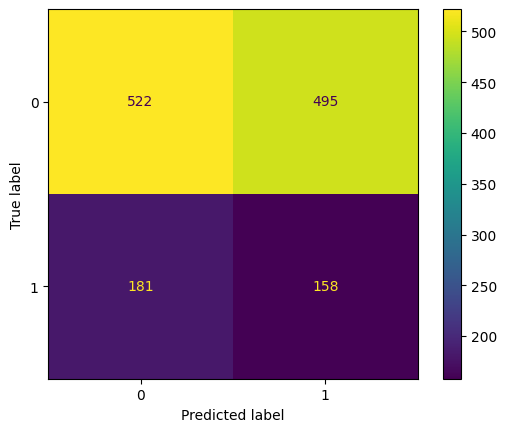

In [ ]:
# Exibindo a matriz de confusão
lr_cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr.classes_)
lr_disp.plot()

In [ ]:
# Printando as métricas
print(f'Acurácia - Treino: {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia - Teste: {accuracy_score(y_test, y_pred_lr)}')
print(10*'-+-')
print(f'Acurácia Balanceada - Treino: {balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Balanceada - Teste: {balanced_accuracy_score(y_test, y_pred_lr)}')
print(10*'-+-')
print(f'F1 - Treino: {f1_score(y_train, lr.predict(x_train))}')
print(f'F1 - Teste: {f1_score(y_test, y_pred_lr)}')

Acurácia - Treino: 0.5195475780673715
Acurácia - Teste: 0.5014749262536873
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada - Treino: 0.5125412253977465
Acurácia Balanceada - Teste: 0.4896755162241888
-+--+--+--+--+--+--+--+--+--+-
F1 - Treino: 0.341644204851752
F1 - Teste: 0.3185483870967742


### Random Forest Classifier:

In [ ]:
# Criando, treinando e testando o modelo
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_train, y_train)
y_pred_rf = (rf.predict(x_test))

In [ ]:
# Visualizando na tabela
x_test.assign(churn = y_test).assign(label = y_pred_rf)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
5273,0.725490,0.304978,0.2,0.0,1.00,0.2,0.0,1.0,0.0,0.0,1.0,0,0
5213,0.784314,0.042361,0.4,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
3167,0.823529,0.201758,0.6,0.0,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,1
4003,0.333333,0.770381,0.2,0.0,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0,0
1564,0.745098,0.000000,0.2,0.0,0.00,0.8,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.392157,0.467573,0.2,0.0,0.25,0.4,0.0,1.0,0.0,0.0,1.0,1,0
3679,0.568627,0.000000,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
192,0.019608,0.611898,0.4,0.0,0.00,0.6,1.0,0.0,0.0,1.0,0.0,0,0
5010,0.882353,0.894839,0.4,0.0,0.50,0.6,1.0,0.0,1.0,0.0,0.0,0,0


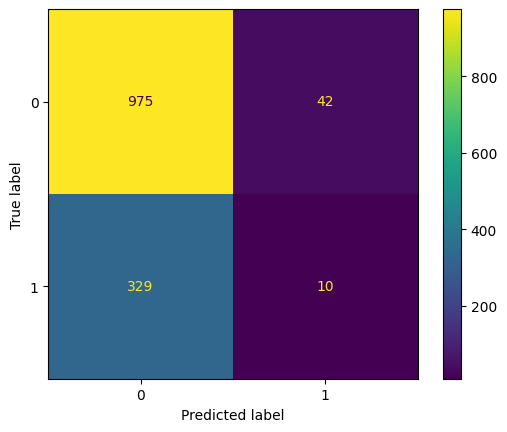

In [ ]:
# Exibindo a matriz de confusão
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
rf_disp.plot()

In [ ]:
# Printando as métricas
print(f'Acurácia - Treino: {accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia - Teste: {accuracy_score(y_test, y_pred_rf)}')
print(10*'-+-')
print(f'Acurácia Balanceada - Treino: {balanced_accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia Balanceada - Teste: {balanced_accuracy_score(y_test, y_pred_rf)}')
print(10*'-+-')
print(f'F1 - Treino: {f1_score(y_train, rf.predict(x_train))}')
print(f'F1 - Teste: {f1_score(y_test, y_pred_rf)}')

Acurácia - Treino: 0.9982788296041308
Acurácia - Teste: 0.726401179941003
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada - Treino: 0.9988524590163934
Acurácia Balanceada - Teste: 0.4941002949852507
-+--+--+--+--+--+--+--+--+--+-
F1 - Treino: 0.9965703086722195
F1 - Teste: 0.05115089514066497


### Tunning:

Apesar dos sinais de overfitting, o modelo que mostrou melhor desempenho foi o Random Forest Regressor. Otimizaremos então seus hiperparâmetros.

In [ ]:
# Definimos max_depth e n_estimators como os parâmetros a serem otimizados, e damos os valores a serem testados.
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'n_estimators': [100, 300, 500]}

# Criamos e treinamos o Grid Search, com o objetivo de melhorar a acurácia.
gs = GridSearchCV(rf, params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(x_train, y_train)

# Obtemos os melhores parâmetros, para aplicarmos no modelo.
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Criando, treinando e testando o modelo otimizado
rf_tunned = RandomForestClassifier(bootstrap = True,
                                   ccp_alpha = 0.0,
                                   class_weight = 'balanced',
                                   criterion = 'gini',
                                   max_depth = 10,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = None,
                                   max_samples = None,
                                   min_impurity_decrease = 0.0,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0,
                                   n_estimators = 500,
                                   n_jobs = None,
                                   oob_score = False,
                                   random_state = None,
                                   verbose = 0,
                                   warm_start = False)
rf_tunned.fit(x_train, y_train)
y_pred = pd.DataFrame(rf_tunned.predict(x_test))

In [ ]:
# Visualizando na tabela
x_test.assign(churn = y_test).assign(label = y_pred)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
5273,0.725490,0.304978,0.2,0.0,1.00,0.2,0.0,1.0,0.0,0.0,1.0,0,NaN
5213,0.784314,0.042361,0.4,0.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,NaN
3167,0.823529,0.201758,0.6,0.0,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,NaN
4003,0.333333,0.770381,0.2,0.0,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0,NaN
1564,0.745098,0.000000,0.2,0.0,0.00,0.8,1.0,0.0,0.0,1.0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.392157,0.467573,0.2,0.0,0.25,0.4,0.0,1.0,0.0,0.0,1.0,1,NaN
3679,0.568627,0.000000,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,NaN
192,0.019608,0.611898,0.4,0.0,0.00,0.6,1.0,0.0,0.0,1.0,0.0,0,0.0
5010,0.882353,0.894839,0.4,0.0,0.50,0.6,1.0,0.0,1.0,0.0,0.0,0,NaN


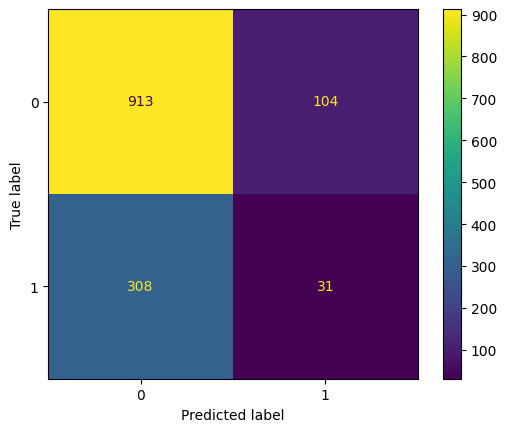

In [ ]:
# Exibindo a matriz de confusão
rf_tunned_cm = confusion_matrix(y_test, y_pred, labels=rf_tunned.classes_)
rf_tunned_disp = ConfusionMatrixDisplay(confusion_matrix=rf_tunned_cm, display_labels=rf_tunned.classes_)
rf_tunned_disp.plot()

In [ ]:
# Printando as métricas
print(f'Acurácia - Treino: {accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia - Teste: {accuracy_score(y_test, y_pred)}')
print(10*'-+-')
print(f'Acurácia Balanceada - Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia Balanceada - Teste: {balanced_accuracy_score(y_test, y_pred)}')
print(10*'-+-')
print(f'F1 - Treino: {f1_score(y_train, rf_tunned.predict(x_train))}')
print(f'F1 - Teste: {f1_score(y_test, y_pred)}')

Acurácia - Treino: 0.9466437177280551
Acurácia - Teste: 0.696165191740413
-+--+--+--+--+--+--+--+--+--+-
Acurácia Balanceada - Treino: 0.9178917420249206
Acurácia Balanceada - Teste: 0.49459193706981314
-+--+--+--+--+--+--+--+--+--+-
F1 - Treino: 0.889679715302491
F1 - Teste: 0.13080168776371306


## Observação:
O modelo continua com overfitting, mas ainda assim performa melhor que a Regressão Logística. \
Percebemos, então, que se trata de uma base de dados em que o modelo se torna irrelevante, uma vez que as métricas continuam ruins.